# Decision Tree

Vamos a trabajar con el árbol de decisiones. Veamos el ejemplo de las transparencias.

## Cálculo de la entropía en el ejemplo 

![patients_drugs.png](patients_drugs.png)

Para ello vamos a calcular la entropía de ShaNnon, que nos habla de la información

$$E = \sum_i p_i \log_2(p_1)$$

In [2]:
import numpy as np
## Calculamos la entropía Drug A = 5, Drug B = 9, total 14.

pa = 5.0/14.0
pb = 9.0/14.0

#E = -pa*np.log2(pa)- pb*np.log2(pb)


def entropy(pa,pb):
    E=-pa*np.log2(pa)- pb*np.log2(pb)
    return E

E0 = entropy(pa,pb)
E0

0.9402859586706311

Supongamos que ahora tenemos que elegir una propiedad, por ejemplo sexo o colesterol. Vamos a usar la information Gain

In [3]:
## Elegimos sexo y Cholesterol
### SEX
## F: se nos quedan 7 muestras divididas en 3B,4A
## M: se nos quedan 7 muestras divididas en 6B,1A
### CHOLESTEROL
## N: se nos queda 8 muestras con 6B,2A
## H: se nos quedan 6 muestras con 3B,3A
## Calculemos la Information Gain de las dos propiedades

G_sex = E0 - ((7/14)*entropy(3/7,4/7)+(7/14)*entropy(6/7,1/7))
G_col = E0 -((8/14)*entropy(6/8,2/8)+(6/14)*entropy(3/6,3/6))

print(G_sex,G_col)

0.15183550136234159 0.04812703040826949


Elegimos siempre el que nos de mayor **Information Gain**. Por tanto, en este ejemplo el sex

# Decision Tree

Vamos a hacer un decision tree con nuestra querida base de datos de iris

In [4]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

In [5]:
iris=load_iris()


In [6]:
y = iris.target
X = iris.data

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [16]:
from sklearn.tree import DecisionTreeClassifier

#tree = DecisionTreeClassifier(random_state=0,criterion="entropy")
#tree.fit(X_train, y_train)

# Fit the classifier with default hyper-parameters
clf = DecisionTreeClassifier(random_state=1234, criterion="entropy")
model = clf.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(clf.score(X_train, y_train))) 
print("Accuracy on test set: {:.3f}".format(clf.score(X_test, y_test)))



Accuracy on training set: 1.000
Accuracy on test set: 0.974


If we don’t restrict the depth of a decision tree, the tree can become arbitrarily deep and complex. 
Unpruned trees are therefore prone to **overfitting** and **not generalizing well** to new data. 

In [17]:
from sklearn import tree
import matplotlib.pyplot as plt

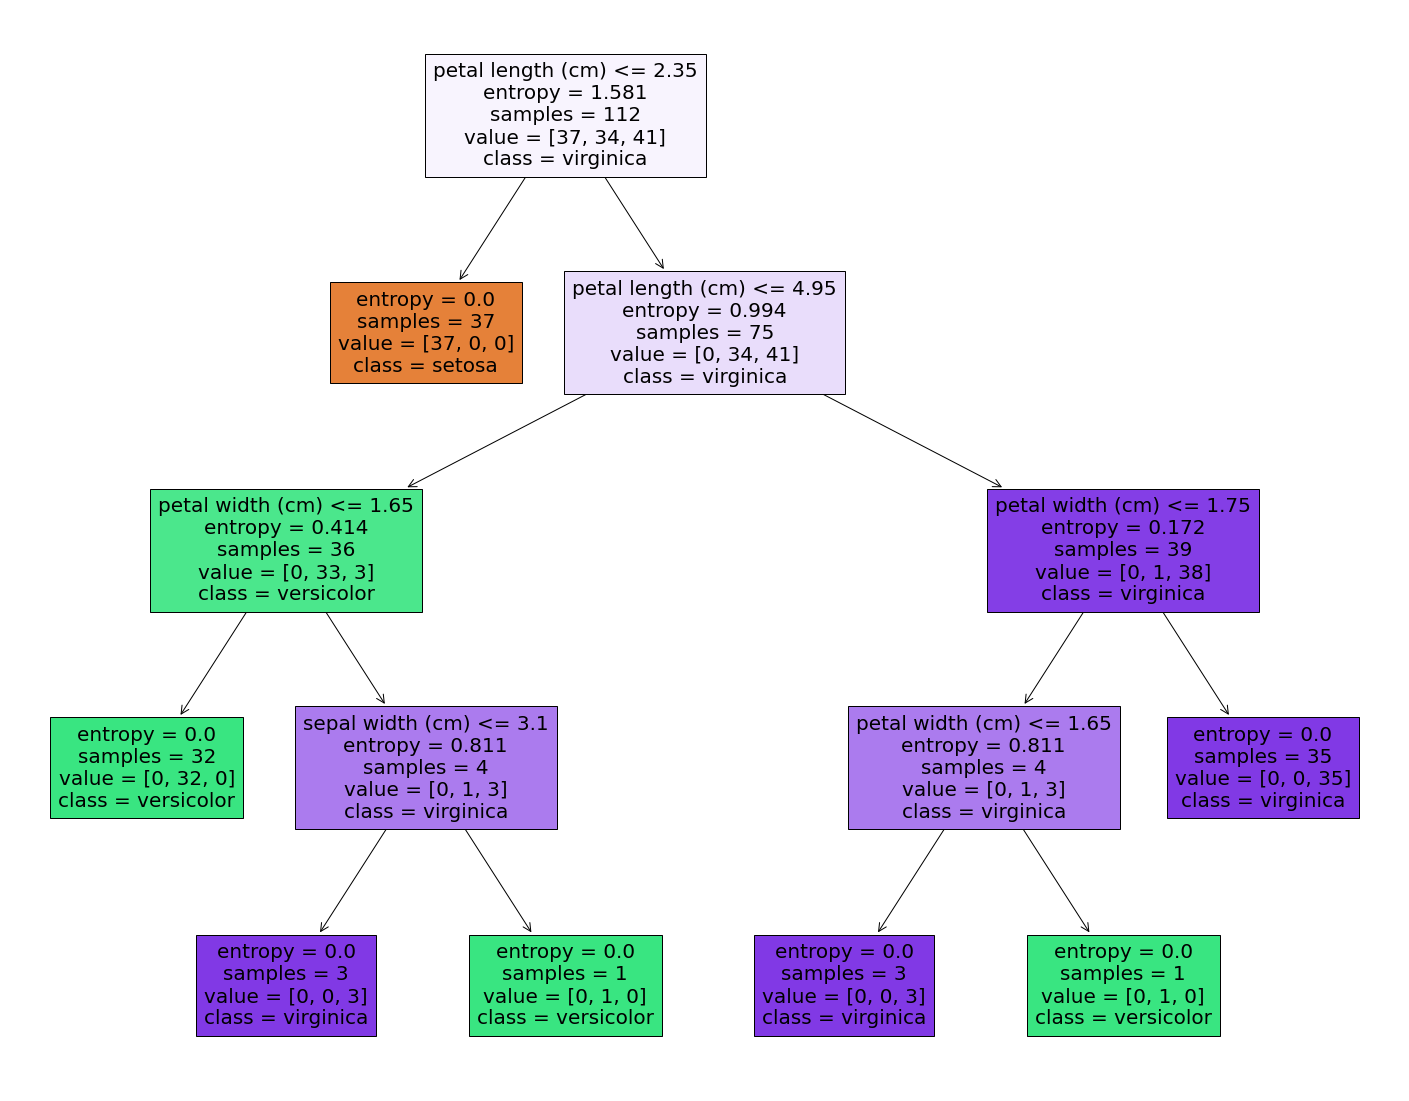

In [18]:
fig = plt.figure(figsize=(25,20))
_=tree.plot_tree(clf, 
                   feature_names=iris.feature_names,  
                   class_names=iris.target_names,
                   filled=True)

Para evitar el problema del overfitting con el de entrenamiento y una mala generalización, lo que se recomienda es que se le ponga un límite en el número de ramificaciones `max_depth = número`. Normalmente esto hace que mejore la precisión en el grupo del test.

In [21]:
clf = DecisionTreeClassifier(random_state=1234, criterion="entropy",max_depth=3)
model = clf.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(clf.score(X_train, y_train))) 
print("Accuracy on test set: {:.3f}".format(clf.score(X_test, y_test)))



Accuracy on training set: 0.982
Accuracy on test set: 0.974


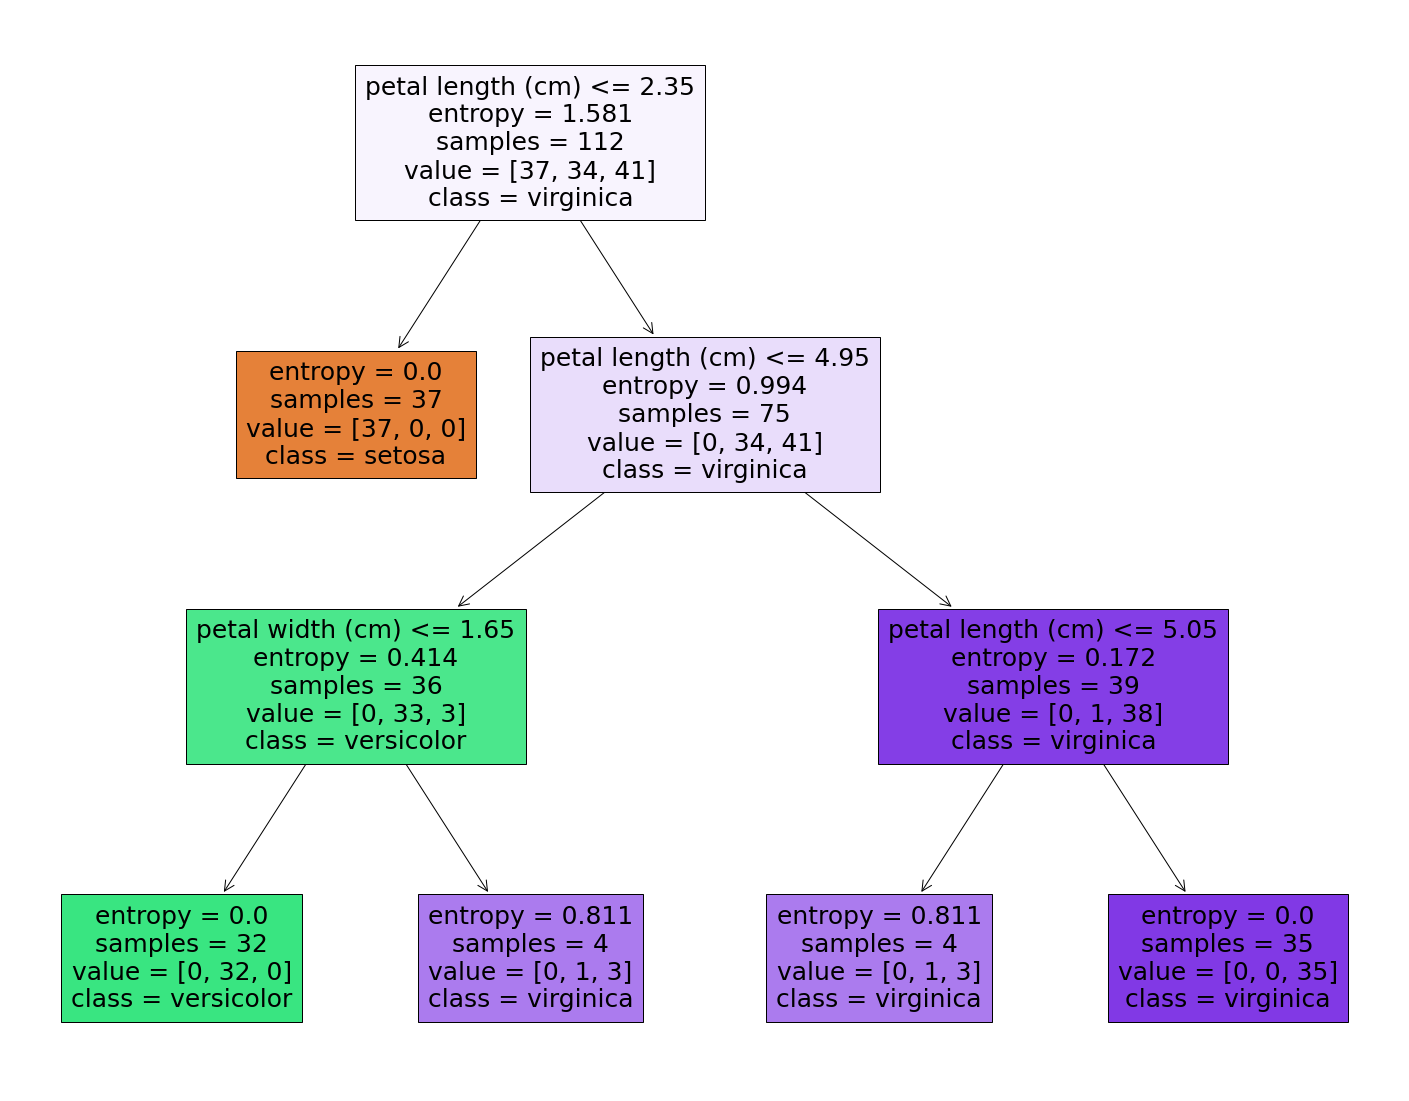

In [22]:
fig = plt.figure(figsize=(25,20))
_=tree.plot_tree(clf, 
                   feature_names=iris.feature_names,  
                   class_names=iris.target_names,
                   filled=True)